In [32]:
from torchsummary import summary
from datetime import datetime
import torchvision.transforms as transforms
import torch.nn as nn
import torch
import numpy as np

from src.nn.regression_dataset import RegressionDataset
from src.nn.to_tensor import ToTensor
from src.nn.create_data_loaders import create_data_loaders
from src.nn.cnn_regressor import CNNRegressor
from src.nn.weighted_mse_loss import WeightedMSELoss
from src.nn.training import training
from src.nn.plot_losses import plot_losses
from src.data.synthMRWregul import synthMRWregul
import src.ctes.num_ctes as nctes
import src.ctes.str_ctes as sctes

In [2]:
data_path = "../../data/MRW.npz"
transform = ToTensor()
sample_size = nctes.LEN_SAMPLE

data = RegressionDataset(data_path, transform, sample_size)

In [3]:
batch_size = 64
valid_size = 0.2
test_size = 0.8

train_loader, valid_loader, test_loader = create_data_loaders(batch_size, valid_size, test_size, data)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device ' + str(device))

Using device cuda


In [5]:
model = CNNRegressor(input_size=sample_size)
model.to(device=device)

summary(model, (1, sample_size))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 16, 32768]           --
|    └─Conv1d: 2-1                       [-1, 16, 32768]           16
|    └─BatchNorm1d: 2-2                  [-1, 16, 32768]           32
|    └─ReLU: 2-3                         [-1, 16, 32768]           --
├─Sequential: 1-2                        [-1, 32, 32767]           --
|    └─Conv1d: 2-4                       [-1, 32, 32767]           1,024
|    └─BatchNorm1d: 2-5                  [-1, 32, 32767]           64
|    └─ReLU: 2-6                         [-1, 32, 32767]           --
├─AvgPool1d: 1-3                         [-1, 32, 16384]           --
├─Sequential: 1-4                        [-1, 64, 16381]           --
|    └─Conv1d: 2-7                       [-1, 64, 16381]           8,192
|    └─BatchNorm1d: 2-8                  [-1, 64, 16381]           128
|    └─ReLU: 2-9                         [-1, 64, 16381]           --
├─AvgPoo

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 16, 32768]           --
|    └─Conv1d: 2-1                       [-1, 16, 32768]           16
|    └─BatchNorm1d: 2-2                  [-1, 16, 32768]           32
|    └─ReLU: 2-3                         [-1, 16, 32768]           --
├─Sequential: 1-2                        [-1, 32, 32767]           --
|    └─Conv1d: 2-4                       [-1, 32, 32767]           1,024
|    └─BatchNorm1d: 2-5                  [-1, 32, 32767]           64
|    └─ReLU: 2-6                         [-1, 32, 32767]           --
├─AvgPool1d: 1-3                         [-1, 32, 16384]           --
├─Sequential: 1-4                        [-1, 64, 16381]           --
|    └─Conv1d: 2-7                       [-1, 64, 16381]           8,192
|    └─BatchNorm1d: 2-8                  [-1, 64, 16381]           128
|    └─ReLU: 2-9                         [-1, 64, 16381]           --
├─AvgPoo

In [6]:
c1_weight      = 1 / 0.8
c2_weight      = 1 / 0.08
L_weight       = 1 / 5000
epsilon_weight = 1 / 4.5
mse_weights    = torch.FloatTensor([c1_weight, c2_weight, L_weight, epsilon_weight]).to(device=device)
criterion = WeightedMSELoss(mse_weights)
print(f"{criterion = }")
print(f"{criterion.weights = }")

criterion = WeightedMSELoss()
criterion.weights = tensor([1.2500e+00, 1.2500e+01, 2.0000e-04, 2.2222e-01], device='cuda:0')


In [105]:
params = model.parameters()
lr = 0.001

optimizer = torch.optim.Adam(params, lr)

In [ ]:
timestamp = datetime.now().strftime('%Y_%m_%d__%H_%M_%S')
model_path = f"../../data/model_{timestamp}.pt"
losses_path = f"../../data/losses_{timestamp}.npz"

In [ ]:
n_epochs = 20

train_losses, valid_losses = training(n_epochs, train_loader, valid_loader, model, criterion, optimizer, device, model_path)

Epoch 1/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:47<00:00, 18.37s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.12it/s]


Epoch: 1 	training Loss: 2403.609713 	validation Loss: 434.089203
Validation loss decreased (inf --> 434.089203).  Saving model ...
Epoch 2/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:51<00:00, 18.50s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.12it/s]


Epoch: 2 	training Loss: 232.189727 	validation Loss: 134.722389
Validation loss decreased (434.089203 --> 134.722389).  Saving model ...
Epoch 3/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:44<00:00, 18.28s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Epoch: 3 	training Loss: 99.660317 	validation Loss: 98.011503
Validation loss decreased (134.722389 --> 98.011503).  Saving model ...
Epoch 4/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:45<00:00, 18.31s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.12it/s]


Epoch: 4 	training Loss: 91.698293 	validation Loss: 93.165280
Validation loss decreased (98.011503 --> 93.165280).  Saving model ...
Epoch 5/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:46<00:00, 18.32s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Epoch: 5 	training Loss: 86.992496 	validation Loss: 88.664742
Validation loss decreased (93.165280 --> 88.664742).  Saving model ...
Epoch 6/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:44<00:00, 18.28s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Epoch: 6 	training Loss: 83.993411 	validation Loss: 86.704399
Validation loss decreased (88.664742 --> 86.704399).  Saving model ...
Epoch 7/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:44<00:00, 18.28s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Epoch: 7 	training Loss: 80.575210 	validation Loss: 84.115528
Validation loss decreased (86.704399 --> 84.115528).  Saving model ...
Epoch 8/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:44<00:00, 18.26s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Epoch: 8 	training Loss: 78.289100 	validation Loss: 79.012016
Validation loss decreased (84.115528 --> 79.012016).  Saving model ...
Epoch 9/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:42<00:00, 18.21s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Epoch: 9 	training Loss: 76.117352 	validation Loss: 76.224640
Validation loss decreased (79.012016 --> 76.224640).  Saving model ...
Epoch 10/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:43<00:00, 18.25s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.14it/s]


Epoch: 10 	training Loss: 71.029479 	validation Loss: 72.722704
Validation loss decreased (76.224640 --> 72.722704).  Saving model ...
Epoch 11/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:41<00:00, 18.18s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.14it/s]


Epoch: 11 	training Loss: 67.108203 	validation Loss: 69.212138
Validation loss decreased (72.722704 --> 69.212138).  Saving model ...
Epoch 12/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:44<00:00, 18.25s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.14it/s]


Epoch: 12 	training Loss: 62.995093 	validation Loss: 67.791914
Validation loss decreased (69.212138 --> 67.791914).  Saving model ...
Epoch 13/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:43<00:00, 18.23s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.14it/s]


Epoch: 13 	training Loss: 60.440386 	validation Loss: 63.573414
Validation loss decreased (67.791914 --> 63.573414).  Saving model ...
Epoch 14/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:43<00:00, 18.23s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.14it/s]


Epoch: 14 	training Loss: 57.365357 	validation Loss: 58.499450
Validation loss decreased (63.573414 --> 58.499450).  Saving model ...
Epoch 15/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:43<00:00, 18.24s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.14it/s]


Epoch: 15 	training Loss: 54.026526 	validation Loss: 58.289474
Validation loss decreased (58.499450 --> 58.289474).  Saving model ...
Epoch 16/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:43<00:00, 18.24s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Epoch: 16 	training Loss: 52.620844 	validation Loss: 59.753458
Epoch 17/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:43<00:00, 18.23s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.13it/s]


Epoch: 17 	training Loss: 48.840387 	validation Loss: 62.972973
Epoch 18/20 ...
Training ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [09:43<00:00, 18.24s/it]


Validating ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.14it/s]


Epoch: 18 	training Loss: 47.632184 	validation Loss: 52.344090
Validation loss decreased (58.289474 --> 52.344090).  Saving model ...
Epoch 19/20 ...
Training ...


 22%|███████████████████████████▎                                                                                                 | 7/32 [02:07<07:37, 18.29s/it]

In [7]:
train_losses = [2403.609713, 232.189727, 99.660317, 86.992496, 83.993411, 80.575210, 78.289100, 76.117352, 71.029479, 67.108203, 62.995093, 60.440386, 57.365357, 54.026526, 52.620844, 48.840387, 47.632184]
valid_losses = [434.089203, 134.722389, 98.011503, 88.664742, 86.704399, 84.115528, 79.012016, 76.117352, 72.722704, 69.212138, 67.791914, 63.573414, 58.499450, 58.289474, 59.753458, 62.972973, 52.344090]

In [30]:
losses_path = f"../../data/losses_{timestamp}.npz"
np.savez(losses_path , train=np.array(train_losses), val=np.array(valid_losses))

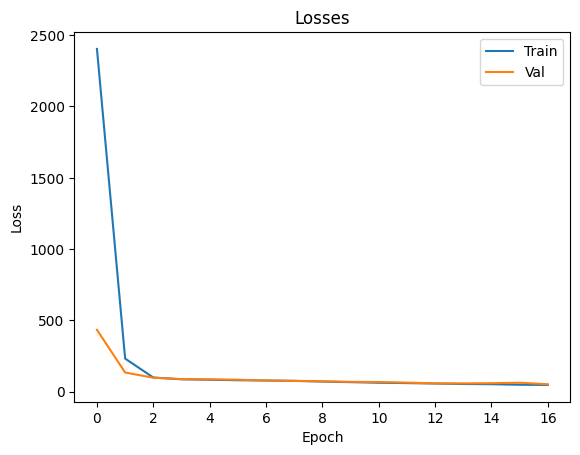

In [31]:
plot_losses(len(train_losses), [train_losses, valid_losses], ["Train", "Val"])

In [27]:
model.load_state_dict(torch.load(model_path, map_location=device))

<All keys matched successfully>

In [ ]:
# ToDo
 
# On cnn_base.py : 
# Change Flatten layer by some ConvTranspose1d before the linear dense layer

# On this notebook : 
# Predict statistics on test data
    # Data can be accesed using 'test_loader'
    # Use trained model for predicting
# Evaluate predicted statistics using MSE or RMSE for each statistic individually
# Reconstruct test samples using 'synthMRWregul' on the predicted statistics
# Evaluate reconstructions using MSE or RMSE over the whole length of the original and reconstructed sample
# Plot some test samples and its reconstruction on the same figure for each pair.

# On the project
# Install the project on Schools Computers
# Search how to train the model remotely